<b>Problem Statement:</b>
    
India Housing Finance offers home loans for low-income housing. They have presence across all urban, semi urban and rural areas. When customer applies for home loan, the company validates the customer eligibility for loan. They want to automate the loan eligibility process based on customer details provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History etc.

Feature					Description

<br>Loan_ID           &nbsp;&nbsp;&nbsp; Unique Loan ID
<br>Gender 			  &nbsp;&nbsp;&nbsp;	 Male/ Female 
<br>Married 			&nbsp;&nbsp;&nbsp;	 Applicant married (Y/N) 
<br>Dependents 			&nbsp;&nbsp;&nbsp;	 Number of dependents 
<br>Education 			&nbsp;&nbsp;&nbsp;	 Applicant Education (Graduate/Under Graduate) 
<br>Self_Employed 		&nbsp;&nbsp;&nbsp;	 Self-employed (Y/N) 
<br>ApplicantIncome 	&nbsp;&nbsp;&nbsp;	 Applicant income 
<br>CoapplicantIncome &nbsp;&nbsp;&nbsp;	 Applicant income 
<br>LoanAmount 			&nbsp;&nbsp;&nbsp;	 Loan amount in thousands 
<br>Loan_Amount_Term 	&nbsp;&nbsp;&nbsp;	 Term of loan in months 
<br>Credit_History 		&nbsp;&nbsp;&nbsp;	 Credit history meets guidelines 
<br>Property_Area		&nbsp;&nbsp;&nbsp;	 Urban/ Semi Urban/ Rural
<br>Loan_Status			&nbsp;&nbsp;&nbsp;	 Loan approved (Y/N) - Target (Class) Variable

In [180]:
import pandas as pd
import matplotlib as mpl
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sb
import pydot 
import io
from sklearn import tree
from sklearn.tree import export_graphviz

<B>Importing Data</B>

In [181]:
data = pd.read_csv("LoanApplicantData.csv")
testSize= 0.33

<b>Data Analytics and Analysis:</b>

In [182]:

print("Reviewing data......",data.head())

print("\n\n\nShape of data...",data.shape)

print("\n\n\nDescribing different numeric attributes...",data.describe().T)

print("\n\n\nUnderstanding different attributes types...\n\n")
print(data.info())

Reviewing data......     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  

########################################################################

Understandings from data:

Classifying train data columns to different types of attributes

Categorical / Nominal:
Gender, 
Married,
Self_Employed, 
Credit_history

Ordinal:
Dependents, Education, Property_Area

Numeric:
ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term
########################################################################

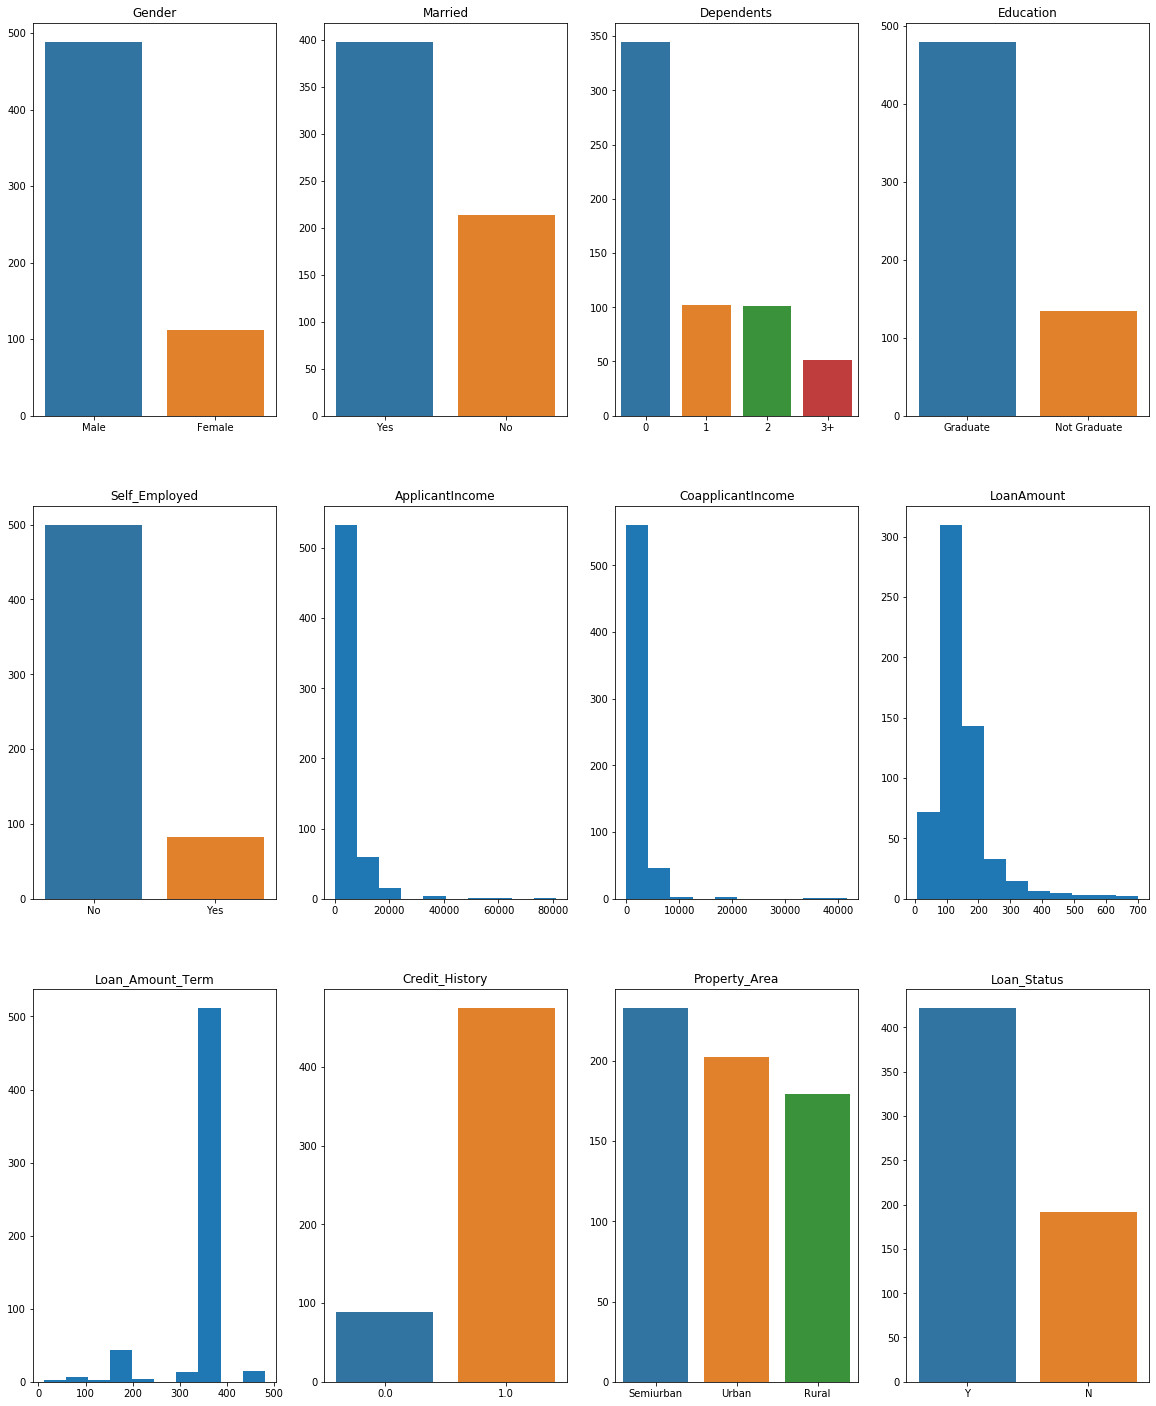

In [183]:
"""Plotting all the attributes to get a visualization of the 
   intra-column data  split
"""

graphRow, graphCol = 0, 0
catch,dims = plt.subplots(3, 4, figsize = (20, 25))
plt.subplots_adjust(hspace = .23)

for att in data.columns[1:]:
    if att in ['Loan_Amount_Term','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']:
       dims[graphRow,graphCol].hist(data[att].dropna())
                
    else:
        bar_data = data[att].value_counts()
        sb.barplot(bar_data.index, bar_data.values, ax = dims[graphRow,graphCol])
    dims[graphRow, graphCol].set_title(att)
    graphCol += 1 
    if graphCol ==4:
        graphRow += 1
        graphCol = 0

########################################################################

Column wise interpretation of data from above graph:
***********************************
Gender  :   Male      489,  Female    112
            80% of the applicants are male.

Married :   Yes       398,   No     213
            Around 65% of applicants are married

Dependents: 0     345, 1     102, 2     101, 3+     51
            Majority of the applicants have no dependents

Education: Graduate       480, Not Graduate    134
            80% of the applicants are Graduates.
            
Self_Employed:  No     500,Yes     82
                Majority are employed

Applicant Income:
    From the graph we see that majority of them fall in between 150-23,000  with a mean of 5403.0
    while some records (pobably outliers)  extend towards 80,000

CoapplicantIncome: Varies from 0 to 41667.0 with a mean value of 1621.2

LoanAmount: Varies from 9 to 700 with a mean of 146.4 with a third quartile value of 168.00

CreditHistory: 1.0  475 and 0.0   89
                Around 85% of applicants hace good credit history

Property_Area: Semiurban    233, Urban        202, Rural        179
                Distribution is uniform with semi urban having little more applicants

Loan Status: Y    422, N    192
            Loan approval seems to be good for the given data with an approval% of around 70%
            
########################################################################

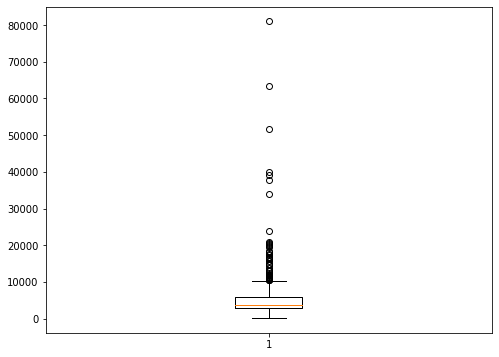

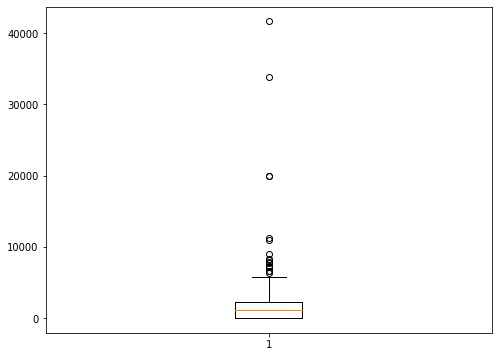

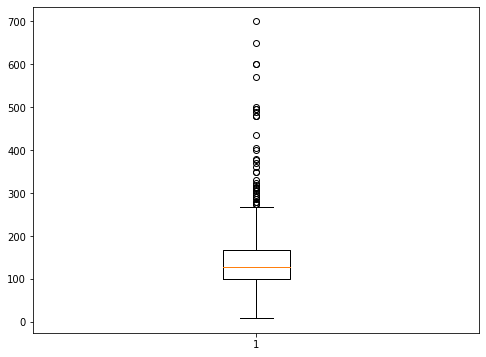

In [184]:
""" Boxplot to visualize the distribution of numeri data
    This should help us understand the outliers"""

fig = plt.figure(figsize=(8,6))
plt.boxplot([x for x in data['ApplicantIncome']])
plt.show()

fig = plt.figure(figsize=(8,6))
plt.boxplot([x for x in data['CoapplicantIncome'].dropna()])
plt.show()

fig = plt.figure(figsize=(8,6))
plt.boxplot([x for x in data['LoanAmount'].dropna()])
plt.show()

########################################################################
<br> Understandings from Boxplot:

This give a more detailed view of the outliers.    
Outlier by book is : anything beyond 1.5 times the IQR which is Q3-Q1
    
Applicant Income:
    IQR = 1.5(5795-2877.5) = 4377 => normal data distribution range is [ -1490 to 10,172]
    So all incomes greater than 10,172 are potential outliers.

CoapplicantIncome: 
    IQR = 1.5(2297.25-0) = 3445.87 => normal data distribution range is [ -3445.87 to 5743.12]
    So all co-applicant incomes greater than 5743.12 are potential outliers.

LoanAmount: 
    1.5(168-100) = 102 => normal data distribution range is [ -2 to 270]
    So all loan amounts greater than 270 are potential outliers.

########################################################################

########################################################################
Let's understand how much LoanApproval status is dependent on different 
categories of each attribute
For this we try to plot a graph for each attribute showing this dependency
X-axis shows the different categories of each attribute while on Y-axis 
we show the loan approval count
########################################################################

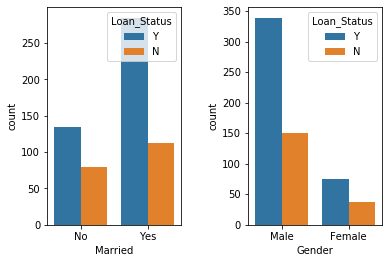

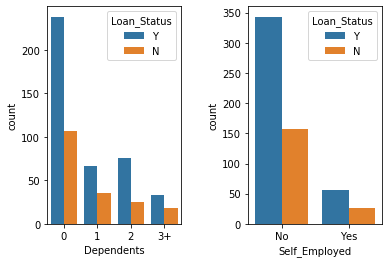

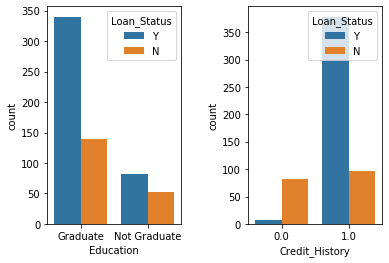

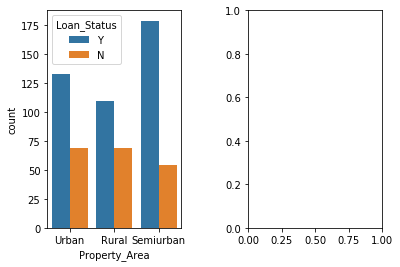

In [185]:
f, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace = .50)

sb.countplot(x='Married',hue="Loan_Status",data=data,orient='v' , ax=axes[0])
sb.countplot(x='Gender',hue="Loan_Status",data=data,orient='v' , ax=axes[1])


f, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace = .50)
sb.countplot(x='Dependents',hue="Loan_Status",data=data,orient='v' , ax=axes[0])
sb.countplot(x='Self_Employed',hue="Loan_Status",data=data,orient='v' , ax=axes[1])


f, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace = .50)
sb.countplot(x='Education',hue="Loan_Status",data=data,orient='v' , ax=axes[0])
sb.countplot(x='Credit_History',hue="Loan_Status",data=data,orient='v' , ax=axes[1])

f, axes = plt.subplots(1, 2)
plt.subplots_adjust(wspace = .50)
sb.countplot(x='Property_Area',hue="Loan_Status",data=data,orient='v' , ax=axes[0])


########################################################################<br>
Understanding from the graph analysis above

1. Married       : Applicant who are married have better chances of gettting loan approved
2. Gender         : Male applicants have better chances of loan approval - note the male population is more
3. Dependents     : Applicants with no dependents have more chance of loan approval
4. Self-Employed  : Not self-employed have got better chances 
5. Education      : Gradutes have higher chances of getting loan approved compared to non-gradutes
6. Credit History : Good credit history is a very good indicator of loan approval
7. Property Area  : Semi urban applicants have relatively better chance for loan approval
########################################################################

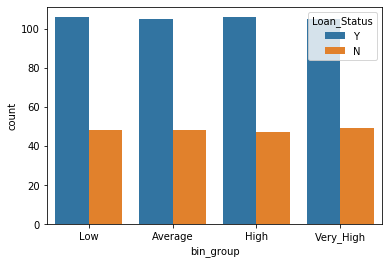

In [186]:
#For Numerical data lets bin the data and analyze the dependencies 
#creating bins using min,25%,50%,75% and max values of the applicant income distrubution
bins = [0, 2877, 3812, 5795, 81000]
group = ['Low','Average','High', 'Very_High']

data['bin_group']=pd.cut(data['ApplicantIncome'],bins,labels=group)
plt.subplots_adjust(wspace = .50)
sb.countplot(x='bin_group',hue="Loan_Status",data=data,orient='v' )

Nothing much to infer from applicant income as all groups have same proportion of approved and rejected 
applicants

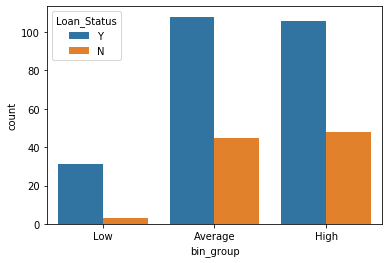

In [187]:
#creating bins using min,25%,50%,75% and max values of the Coapplicant income distrubution
bins = [0, 1188, 2297, 41667]
group = ['Low','Average','High']

data['bin_group']=pd.cut(data['CoapplicantIncome'],bins,labels=group)
plt.subplots_adjust(wspace = .50)
sb.countplot(x='bin_group',hue="Loan_Status",data=data,orient='v' )

Low Coapplicant income is indiacator for higher chances of approval - but note that the count of records in this group is very less comparitively- thus not much inference from this attribute

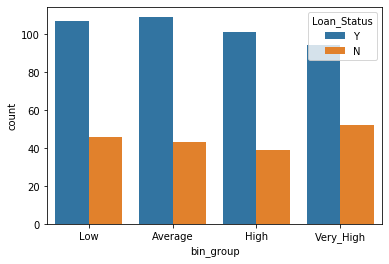

In [188]:
#creating bins using min,25%,50%,75% and max values of the Loan Amount distrubution
bins = [9, 100, 128, 168, 700]
group = ['Low','Average','High', 'Very_High']

data['bin_group']=pd.cut(data['LoanAmount'],bins,labels=group)
plt.subplots_adjust(wspace = .50)
sb.countplot(x='bin_group',hue="Loan_Status",data=data,orient='v' )

Nothing much to infer from applicant income as all groups have same proportion of approved and rejected 
applicants

Usually high income should improve chances of getting loan but ApplicantIncome and Coapplicant income 
individually are not indicating much.
So lets try combining them to create a totalincome field for each applicant and see how that is impacting
the chances of loan.

In [189]:
data['Total_income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0
Total_income,614.0,7024.705081,6458.663872,1442.0,4166.0,5416.5,7521.75,81000.0


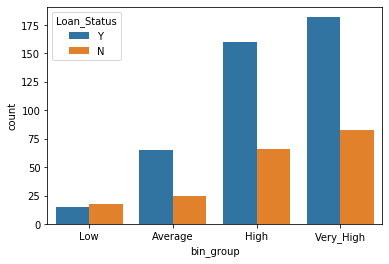

In [190]:
#creating bins using min,25%,50%,75% and max values of the Total_income distrubution
bins = [0, 2877, 3812, 5795, 81000]
group = ['Low','Average','High', 'Very_High']

data['bin_group']=pd.cut(data['Total_income'],bins,labels=group)
plt.subplots_adjust(wspace = .50)
sb.countplot(x='bin_group',hue="Loan_Status",data=data,orient='v' )

This clearly shows that if total income is high or very high then the chances of getting loan approved improved 
significantly

<b>Data Pre-Processing</b>

#Missing value analysis

In [191]:
print('Total blank values-->',data.isnull().values.sum())
print(data.isnull().sum())

Total blank values--> 149
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
bin_group             0
Total_income          0
dtype: int64


This shows that there are many missing values for each attribute.
We need to fill those values selecting the best measure as per the attribute type

i. Missing values for Categorical values will be replace with mode of the attribute distribution
    Ex: Gender,married, Self-Employed<br>
ii. For Attributes like Dependents and Education also missing values are replaced with mode <br>
iii. For Numeric attribute like LoanAmount we go with median to reduce effect of outliers

In [192]:

#Gender processing
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Gender']= data['Gender'].astype('category')
data['Gender'] = data['Gender'].cat.codes

#Married Processsing
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Married']= data['Married'].astype('category')
data['Married'] = data['Married'].cat.codes

#Dependents Processsing
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Dependents']= data['Dependents'].astype('category')
data['Dependents'] = data['Dependents'].cat.codes

#Education Processsing
data['Education'].fillna(data['Education'].mode()[0], inplace=True)
data['Education']= data['Education'].astype('category')
data['Education'] = data['Education'].cat.codes

#Self_Employed Processsing
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['Self_Employed']= data['Self_Employed'].astype('category')
data['Self_Employed'] = data['Self_Employed'].cat.codes

#LoanAmount Processsing
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
#Loan_Amount_Term Processsing
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

#Credit_History Processsing
def loanStatus(s):
    if np.isnan(s['Credit_History']):
        #return data['Self_Employed'].mode()[0]
        if s['Loan_Status'] is 'Y' :
            return 1
        else:
            return 0
    else:
       return s['Credit_History']
data['Credit_History'] = data.apply(loanStatus,axis=1)

#Property_Area Processsing
data['Property_Area']= data['Property_Area'].astype('category')
data['Property_Area'] = data['Property_Area'].cat.codes

#Loan_Status Processsing
data['Loan_Status']= data['Loan_Status'].astype('category')
data['Loan_Status'] = data['Loan_Status'].cat.codes

<b>Correaltion Analysis<b>

In [193]:
data.corr(method='pearson')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.106904,-0.074030,-0.006865,-0.025752,0.017987,0.093191
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.146546,-0.100912,0.014853,0.004257,0.091478,0.083319
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163103,-0.103864,-0.048068,-0.000244,0.010118,0.125590
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.168759,-0.073928,-0.071397,-0.065243,-0.085884,-0.161362
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115100,-0.033739,0.008003,-0.030860,-0.003700,0.113000
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565181,-0.046531,-0.010051,-0.009500,-0.004710,0.893037
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.189218,-0.059383,-0.054737,0.010522,-0.059187,0.342781
LoanAmount,0.106904,0.146546,0.163103,-0.168759,0.115100,0.565181,0.189218,1.000000,0.036960,-0.022299,-0.046632,-0.033214,0.620316
Loan_Amount_Term,-0.074030,-0.100912,-0.103864,-0.073928,-0.033739,-0.046531,-0.059383,0.036960,1.000000,-0.007758,-0.076120,-0.022549,-0.070917
Credit_History,-0.006865,0.014853,-0.048068,-0.071397,0.008003,-0.010051,-0.054737,-0.022299,-0.007758,1.000000,0.004565,0.595642,-0.034306


In [194]:
print("Corr PropArea LoanStatus              ",data['Property_Area'].corr(data['Loan_Status']))
print("Corr Married Loan_Status              ",data['Married'].corr(data['Loan_Status']))
print("Corr ApplicantIncome Loan_Status      ",data['ApplicantIncome'].corr(data['Loan_Status']))
print("Corr ApplicantIncome LoanAmount       ",data['ApplicantIncome'].corr(data['LoanAmount']))
print("Corr Loan_Amount_Term ApplicantIncome ",data['Loan_Amount_Term'].corr(data['ApplicantIncome']))
print("Corr Credit_History Loan_Status       ",data['Credit_History'].corr(data['Loan_Status']))
print("Corr Credit_History Self_Employed     ",data['Credit_History'].corr(data['Self_Employed']))
print("Corr Credit_History LoanAmount        ",data['Credit_History'].corr(data['LoanAmount']))
print("Corr Education Loan_Status            ",data['Education'].corr(data['Loan_Status']))
print("Corr Total Income Loan_Status         ",data['Total_income'].corr(data['Loan_Status']))
print("Corr Credit_History Total_income      ",data['Credit_History'].corr(data['Total_income']))
print("Corr Credit_History Total_income      ",data['Credit_History'].corr(data['Total_income']))
print("Corr Self_Employed Loan_Status      ",data['Self_Employed'].corr(data['Loan_Status']))

Corr PropArea LoanStatus               0.03211198462880024
Corr Married Loan_Status               0.09147782473606036
Corr ApplicantIncome Loan_Status       -0.004709522659351541
Corr ApplicantIncome LoanAmount        0.5651805176233123
Corr Loan_Amount_Term ApplicantIncome  -0.046531121839299014
Corr Credit_History Loan_Status        0.5956415264564683
Corr Credit_History Self_Employed      0.008003234721340041
Corr Credit_History LoanAmount         -0.022298914989495683
Corr Education Loan_Status             -0.0858839146753654
Corr Total Income Loan_Status          -0.0312707788726747
Corr Credit_History Total_income       -0.03430646078011501
Corr Credit_History Total_income       -0.03430646078011501
Corr Self_Employed Loan_Status       -0.0037004377149821317


Points to note from correlation analysis:<br>

i. Credit history positively correlated to loan status <br>
ii.Applicant income and Loan status are almost not correlated <br>
   Also we see that ApplicantIncome and LoanAmount are better 
   correlated hence we can drop ApplicantIncome.<br>
   Coapplicant income is highly correlated to total income<br>
   Thus we canuse  Total_income(Applicant income+Coapplicant income)<br> 
   in place of Applicant income and  Coapplicant income<br>
iii. Self_Employed and Loan_Status are not correlate hence we can drop that column

Since credit history is highly correlated to loan status we derived above in the 
preprocessing step missing values of this field based on the corresponding loan status value

Now that we are using Totalincome inplace of applicantincome we 
normalize the total income values

In [195]:
inc_array = np.array(data['Total_income'])
normalized_inc = preprocessing.normalize([inc_array])
data.insert(loc=4,column='TotalIInc_Normal',value=normalized_inc.T)
data['TotalIInc_Normal']= data['TotalIInc_Normal'].astype('float')

In [196]:
removeCols =['Loan_ID','Self_Employed','ApplicantIncome','bin_group','Total_income']
data=data.drop(columns=removeCols)

In [197]:
data.head()

,Gender,Married,Dependents,TotalIInc_Normal,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0.024745,0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0.025769,0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0.012692,0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0.020904,1,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0.025384,0,0.0,141.0,360.0,1.0,2,1


In [198]:
train, test = train_test_split(data, test_size=testSize)

In [199]:
X_train,y_train = train[train.columns[:-1]], train[train.columns[-1:]]
X_test,y_test = test[test.columns[:-1]], test[test.columns[-1:]]
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [200]:
X_train.head()

,Gender,Married,Dependents,TotalIInc_Normal,Education,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
552,1,1,1,0.027851,0,3250.0,158.0,360.0,1.0,2
253,1,1,1,0.041300,1,7101.0,279.0,180.0,1.0,1
1,1,1,1,0.025769,0,1508.0,128.0,360.0,1.0,0
172,1,1,3,0.014901,1,0.0,81.0,180.0,1.0,0
22,1,1,0,0.019085,1,1911.0,116.0,360.0,0.0,1


In [201]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
naiveB = GaussianNB()
naiveB.fit(X_train,y_train.values.ravel())

y_pred_naiveB = naiveB.predict(X_test)

accuracy_naiveB = round(metrics.accuracy_score(y_test, y_pred_naiveB),2)
print("Accuracy with Naive Bayes classifier:-->",accuracy_naiveB)

Accuracy with Naive Bayes classifier:--> 0.84


In [202]:
#Decision Tree - Gini
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

accuracy_gini = round(metrics.accuracy_score(y_test, y_pred_gini),2)
print("Accuracy with DecisionTree(Gini) classifier:-->",accuracy_gini)

Accuracy with DecisionTree(Gini) classifier:--> 0.84


In [203]:
#Decision Tree - Entropy
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
               max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)

y_pred_entropy = clf_entropy.predict(X_test)
accuracy_entropy = round(metrics.accuracy_score(y_test, y_pred_entropy),2)


print("Accuracy with DecisionTree(Entropy) classifier:-->",accuracy_entropy)


Accuracy with DecisionTree(Entropy) classifier:--> 0.84


<b>Visualizing Decision Tree created:<b>

Decision tree created out of this modeling can be seen in the same folder with names,
1. graph_entropy.pdf - Tree created using entropy
2. graph_gini.pdf - Tree created using gini index

In [204]:
# Visualize Entropy decison tree
dot_data = io.StringIO() 
tree.export_graphviz(clf_entropy, out_file = dot_data, feature_names = X_train.columns)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0] 
graph.write_pdf("graph_entropy.pdf")

In [205]:
# Visualize Gini decison tree
dot_data = io.StringIO() 
tree.export_graphviz(clf_gini, out_file = dot_data, feature_names = X_train.columns)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0] 
graph.write_pdf("graph_gini.pdf")

In [206]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
randomForest=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
randomForest.fit(X_train,y_train.values.ravel())
y_pred_randomForest=randomForest.predict(X_test)

accuracy_randomForest = round(metrics.accuracy_score(y_test, y_pred_randomForest),2)
print("Accuracy with RandomForest classifier:-->",accuracy_randomForest)


Accuracy with RandomForest classifier:--> 0.83


In [207]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs',max_iter=500)
logreg.fit(X_train, y_train.values.ravel())
y_pred_logreg = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

accuracy_logreg = round(metrics.accuracy_score(y_test, y_pred_logreg),2)
print("Accuracy with Logistic Regression classifier:-->",accuracy_logreg)


Accuracy with Logistic Regression classifier:--> 0.85


In [208]:
from sklearn.svm import SVC

svc = SVC(gamma='scale')
svc.fit(X_train, y_train.values.ravel())
y_pred_svc = svc.predict(X_test)

accuracy_svc = round(metrics.accuracy_score(y_test, y_pred_svc),2)
print("Accuracy with SVM classifier:-->",accuracy_svc)

Accuracy with SVM classifier:--> 0.73


In [209]:
len(train),len(test)
import pandas as pd
feature_imp = pd.Series(randomForest.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print("Feature Importance with RandomForest classifier:")
feature_imp

Feature Importance with RandomForest classifier:


Credit_History       0.325161
TotalIInc_Normal     0.204029
LoanAmount           0.175311
CoapplicantIncome    0.096809
Property_Area        0.051288
Dependents           0.042869
Loan_Amount_Term     0.039557
Married              0.023576
Gender               0.020832
Education            0.020566
dtype: float64

No handles with labels found to put in legend.


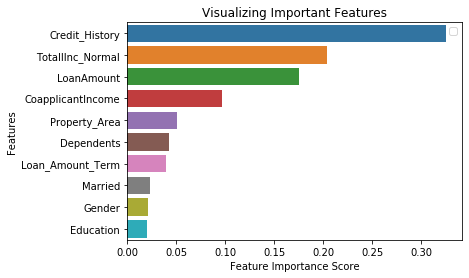

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [211]:
print("Accuracy with SVM classifier:-->                  ",round(accuracy_svc*100,2),'%')
print("Accuracy with DecisionTree(Gini) classifier:-->   ",round(accuracy_gini*100,2),'%')
print("Accuracy with DecisionTree(Entropy) classifier:-->",round(accuracy_entropy*100,2),'%')
print("Accuracy with RandomForest classifier:-->         ",round(accuracy_randomForest*100,2),'%')
print("Accuracy with Naive Bayes classifier:-->          ",round(accuracy_naiveB*100,2),'%')
print("Accuracy with Logistic Regression classifier:-->  ",round(accuracy_logreg*100,2),'%')


Accuracy with SVM classifier:-->                   73.0 %
Accuracy with DecisionTree(Gini) classifier:-->    84.0 %
Accuracy with DecisionTree(Entropy) classifier:--> 84.0 %
Accuracy with RandomForest classifier:-->          83.0 %
Accuracy with Naive Bayes classifier:-->           84.0 %
Accuracy with Logistic Regression classifier:-->   85.0 %


<b>Note</b>

In our initial run we have observed that the accuracy percentage is coming up to 75% <br>
Then from the "Visualizing Important Features" out of RandomForest model we understood that<br>
Credit History and Total_Income are palying very important role in deciding the loan approval status.<br>

Hence derived their missing values accordingly and for Total income we have normalized the data<br>

Post this data pre-procesing we have seen accuracies reaching 85%<br>
This is a significant improvement.
